In [1]:
%matplotlib inline
from pylab import *;import scipy as sp;import numpy as np;import matplotlib.pyplot as plt;
import matplotlib.patches as mpatches;import matplotlib.mlab as mlab;from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable;from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#------------------------------------------------------------------------------------------------------------#
names = ['NA02','NA04','NA07','NA12','NA37','RJS0019','RJS0042'];n_names = len(names)

#------------------------------------------------------------------------------------------------------------#
DATA = []

for i in range(n_names):
    data = np.fromfile('../banco_de_dados_original/'+names[i]+'.dat', dtype=float, count=-1, sep='	')
    alph = int(len(data)/1313);p = int (len(data)/alph);data  = np.reshape(data, (p,alph))
    DATA.append(data)
    
print(DATA[0][:,0]) # 0 a 6 | 0 a 5 | : -> 0 a 1313 (p)

#prof = DATA[i][:,0]
#DTP  = DATA[i][:,1]
#GR   = DATA[i][:,2]
#ILD  = DATA[i][:,3]
#PHIN = DATA[i][:,4]
#RHOb = DATA[i][:,5]

[ 2950.0556  2950.208   2950.3604 ...,  3149.6996  3149.852   3150.0044]


for i in range(n_names):
    #-------------------------------------------------------Graficos--------------------------------------------------#
    fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
    #--------------------------------------------------------------------------------------------------#
    ax1.plot(DATA[i][:,2],DATA[i][:,0],'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
    ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)')
    ax1.set_ylim(ymax=max(DATA[i][:,0]),ymin=min(DATA[i][:,0]))
    ax1.invert_yaxis();ax1.grid()
    #--------------------------------------------------------------------------------------------------#
    ax2.semilogx(DATA[i][:,3],DATA[i][:,0],'-',linewidth = 1,color='olive',label='$ILD$')
    ax2.set_title(u'Resistividade ($R_{ILD}$)');ax2.set_xlabel('$\Omega.m$ \n (b)')
    ax2.set_ylim(ymax=max(DATA[i][:,0]),ymin=min(DATA[i][:,0]))
    ax2.invert_yaxis();ax2.grid()
    #--------------------------------------------------------------------------------------------------#
    ax4.plot(DATA[i][:,1],DATA[i][:,0],'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)') 
    ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(DATA[i][:,0]),ymin=min(DATA[i][:,0]))
    ax4.invert_yaxis();ax4.grid()
    #--------------------------------------------------------------------------------------------------#
    lab5 = ax5.plot(DATA[i][:,4],DATA[i][:,0],'-',linewidth = 1,color='green',label='$\phi_N$')
    ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
    lab0 = ax0.plot(DATA[i][:,5],DATA[i][:,0],'-',linewidth = 1,color='maroon',label='$\\rho$')
    ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
    labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2)
    ax5.set_ylim(ymax=max(DATA[i][:,0]),ymin=min(DATA[i][:,0]))
    ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
    #--------------------------------------------------------------------------------------------------#
    plt.tight_layout();plt.subplots_adjust(top=0.85);#plt.show()
    fig.savefig('KM_image/0'+names[i]+'perfis.jpg', dpi=100, transparent=True, bbox_inches='tight')

In [2]:
#NA12 correcao

GRm = [];ILDm = []; DTPm = []; RHObm = []; PHINm = []
for i in range (40,350):
    GRm.append(DATA[3][i,2]);ILDm.append(DATA[3][i,3]);DTPm.append(DATA[3][i,1]);
    RHObm.append(DATA[3][i,5]);PHINm.append(DATA[3][i,4]);
    
GRm = np.mean(GRm);ILDm = np.mean(ILDm);DTPm = np.mean(DTPm);RHObm = np.mean(RHObm);PHINm = np.mean(PHINm)

for i in range (0,41):
    DATA[3][i,2] = GRm;DATA[3][i,3] = ILDm;DATA[3][i,1] = DTPm;DATA[3][i,5] = RHObm;DATA[3][i,4] = PHINm
    
#NA02 correcao

#prof = DATA[0][:,0]
#DTP  = DATA[0][:,1]
#GR   = DATA[0][:,2]
#ILD  = DATA[0][:,3]
#PHIN = DATA[0][:,4]
#RHOb = DATA[0][:,5]

PHIN2        = []
PHI_interval = []

for i in range (p):
    PHIN2.append(75.40 + (0.09*DATA[0][i,2]) - (24.37*DATA[0][i,5]))

for i in range (int(p/4)):
    if DATA[0][i,4] == -999.000:DATA[0][i,4] = PHIN2[i];

for i in range(n_names):
    #-------------------------------------------------------Graficos--------------------------------------------------#
    fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
    #--------------------------------------------------------------------------------------------------#
    ax1.plot(DATA[i][:,2],DATA[i][:,0],'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
    ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)')
    ax1.set_ylim(ymax=max(DATA[i][:,0]),ymin=min(DATA[i][:,0]))
    ax1.invert_yaxis();ax1.grid()
    #--------------------------------------------------------------------------------------------------#
    ax2.semilogx(DATA[i][:,3],DATA[i][:,0],'-',linewidth = 1,color='olive',label='$ILD$')
    ax2.set_title(u'Resistividade ($R_{ILD}$)');ax2.set_xlabel('$\Omega.m$ \n (b)')
    ax2.set_ylim(ymax=max(DATA[i][:,0]),ymin=min(DATA[i][:,0]))
    ax2.invert_yaxis();ax2.grid()
    #--------------------------------------------------------------------------------------------------#
    ax4.plot(DATA[i][:,1],DATA[i][:,0],'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)') 
    ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(DATA[i][:,0]),ymin=min(DATA[i][:,0]))
    ax4.invert_yaxis();ax4.grid()
    #--------------------------------------------------------------------------------------------------#
    lab5 = ax5.plot(DATA[i][:,4],DATA[i][:,0],'-',linewidth = 1,color='green',label='$\phi_N$')
    ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
    lab0 = ax0.plot(DATA[i][:,5],DATA[i][:,0],'-',linewidth = 1,color='maroon',label='$\\rho$')
    ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
    labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2)
    ax5.set_ylim(ymax=max(DATA[i][:,0]),ymin=min(DATA[i][:,0]))
    ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
    #--------------------------------------------------------------------------------------------------#
    plt.tight_layout();plt.subplots_adjust(top=0.85);#plt.show()
    fig.savefig('KM_image/1'+names[i]+'perfis.jpg', dpi=100, transparent=True, bbox_inches='tight')

In [3]:
#prof = DATA[0][:,0]
#DTP  = DATA[0][:,1]
#GR   = DATA[0][:,2]
#ILD  = DATA[0][:,3]
#PHIN = DATA[0][:,4]
#RHOb = DATA[0][:,5]

DATA2 = []
for j in range(n_names):
    #
    #Raio Gamma-------------------------------------------------------------------------------------------------------
    #
    prof = DATA[j][:,0];DTP  = DATA[j][:,1];GR = DATA[j][:,2];ILD  = DATA[j][:,3];PHIN = DATA[j][:,4];RHOb = DATA[j][:,5]
    IGR = [];VSH = []

    for i in range (p):
        IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
        IGR.append(IGR0)
        Larionov0 = 0.083*((2**(3.70*IGR0))-1)       # Correcao de Larionov para Argilosidade
        VSH.append(Larionov0)
    #
    #Porosidade-------------------------------------------------------------------------------------------------------
    #
    RHOf  = 1.101;DTPf = 189.0;RHOma = 2.65;DTPma = 55.5;RHOsh = 2.56;DTPsh = 85.0
    #------------------------------------------------------------------------------------------------#
    
    PHItd = [];PHIsh = [] # Porosidade total - perfil densidade e Porosidade aparente - folhelho

    for i in range (p):
        PHItd0 = (100*(RHOb[i] - RHOma)/(RHOf - RHOma))# Porosidade total - perfil densidade
        PHIsh.append(PHIN[i] - PHItd0)
        PHItd.append(PHItd0)
    #------------------------------------------------------------------------------------------------#
    for i in range (p):
        if PHIsh[i] == max(PHIsh):Psh = i

    RHOsh2 = RHOb[Psh];VPsh2  = 108.8*(RHOsh2**4.0)
    DTPsh2 = 1.0/((3.2808*(10**(-6)))*VPsh2)
    PHIs0  = 100.0*((DTPsh - DTPma)/(DTPf - DTPma));PHIs1 = 100.0*((DTPsh2 - DTPma)/(DTPf - DTPma))
    #--------------------------------Porosidade Efetiva Densidade------------------------------------#
    PHIed0 = [];PHIed1 = []
    for i in range (p):
        PHIed0.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh  - RHOma)/(RHOf - RHOma)))*100)
        PHIed1.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh2 - RHOma)/(RHOf - RHOma)))*100)

    #-----------------------------------------Porosidade Sonica--------------------------------------------------
    PHIts = [];PHIes0 = [];PHIes1 = []

    DTPsh = DTP[Psh]
    for i in range (p):
        PHIts.append(((DTP[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
        PHIes0.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh  - DTPma)/(DTPf - DTPma))))*100.00)
        PHIes1.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh2 - DTPma)/(DTPf - DTPma))))*100.00)
    
    data2 = [IGR,VSH,PHIed0,PHIed1,PHIes0,PHIes1];DATA2.append(data2)
    '''#--------------------------------------------------------Graficos------------------------------------------------#
    fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
    #--------------------------------------------------------------------------------------------------#
    ax1.plot(IGR,prof,'-',linewidth = 1.3,color='#6A287E',label='$IGR$')
    ax1.plot(VSH,prof,'-',linewidth = 1.3,color='#A74AC7',label='$V_{SH}$')
    ax1.set_title(u'Argilosidades');ax1.set_xlabel('- \n (a)');ax1.set_ylabel('profundidade ($m$)')
    ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.invert_yaxis();ax1.grid();ax1.legend(loc=2)
    #--------------------------------------------------------------------------------------------------#
    ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
    ax2.set_title(u'Resistividade ($R_{ILD}$)');ax2.set_xlabel('$\Omega.m$ \n (b)')
    ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
    #--------------------------------------------------------------------------------------------------#
    ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')    
    ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
    #--------------------------------------------------------------------------------------------------#
    ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
    ax5.plot(PHIed0,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e0,D}$')
    ax5.plot(PHIed1,prof,'-',linewidth = 1,color='red',label='$\phi_{e1,D}$')
    ax5.plot(PHIes0,prof,'-',linewidth = 1,color='Gray'  ,label='$\phi_{e0,S}$')
    ax5.plot(PHIes1,prof,'-',linewidth = 1,color='Black' ,label='$\phi_{e1,S}$')
    ax5.set_title('Porosidades ($\phi$)');ax5.set_xlabel('% \n (e)');ax5.set_ylim(ymax=max(prof),ymin=min(prof))
    ax5.invert_yaxis();ax5.grid();ax5.legend(loc=2)
    #--------------------------------------------------------------------------------------------------#
    plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show();del(IGR)
    fig.savefig('KM_image/2'+names[j]+'perfis.jpg', dpi=100, transparent=True, bbox_inches='tight')'''

In [4]:
DATA3 = []
for j in range(n_names):
    prof = DATA[j][:,0];DTP  = DATA[j][:,1];GR = DATA[j][:,2];ILD  = DATA[j][:,3];PHIN = DATA[j][:,4];RHOb = DATA[j][:,5]
    IGR = DATA2[j][:][0];VSH = DATA2[j][:][1];PHIed0 = DATA2[j][:][2];PHIed1 = DATA2[j][:][3];PHIes0 = DATA2[j][:][4];
    PHIes1 = DATA2[j][:][5]
    #---------------------------------------------------Estimando VP-------------------------------------------------#
    cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

    VP=[] # velocidade de onda P
    for i in range(p):
        VP.append(1.0000/(cfvp*DTP[i]))
    #---------------------------------------------------------------
    DTPp = [];VPp=[];errorP = []
    for i in range (p):
        DTPp0 = (DTPma + (DTPf - DTPma)*((PHIed0[i]/100.0)+(VSH[i]*(PHIs1/100.0))));DTPp.append(DTPp0)
        VPp0 = (1.00/(cfvp*DTPp0));errorP.append(abs(VP[i]-VPp0));VPp.append(VPp0)

    print('rP  =',np.corrcoef(VP,VPp)[0,1],'|mP  =',np.mean(errorP),'|stdP  =',np.std(errorP))
    #--------------------------------------------------Modelo Empirico-----------------------------------------------#
    VPe1=[];errorE1=[]

    for i in range (p): # determinando VPa em ms
        if j == 0:
            VPe01 = (1000*(4.29 - (2.66*PHIed1[i]/100.0) - (1.78*VSH[i]) - (5.38*ILD[i]*(10**(-5)))))#!!!
            VPe1.append(VPe01)
            errorE1.append(abs(VP[i]-VPe01))
        if j == 1:
            VPe01=1000*(4.80 - (8.20*PHIed0[i]/100.0) - (4.31*VSH[i]) + (12.72*(PHIed0[i]/100.0)*VSH[i]) 
            + (10.42*(PHIed0[i]/100)**2) + (2.57*VSH[i]**2))
            errorE1.append(abs(VP[i]-VPe01))
            VPe1.append(VPe01)
        if j == 2:
            VPe01=(1000*(4.84 - (8.43*PHIed1[i]/100.0) - (5.52*VSH[i]) + (18.78*(PHIed1[i]/100.0)*VSH[i]) 
            + (8.94*((PHIed1[i]/100)**2)) + (2.25*VSH[i]**2)));errorE1.append(abs(VP[i]-VPe01));VPe1.append(VPe01)
        if j == 3:
            VPe01=(1000*(4.28 - (5.63*PHIed1[i]/100.0) - (2.74*VSH[i]) + (9.24*(PHIed1[i]/100.0)*VSH[i]) 
            + 6.76*(PHIed1[i]/100.0)**2 + (0.85*(VSH[i])**2)))
            errorE1.append(abs(VP[i]-VPe01))
            VPe1.append(VPe01)
        if j == 4:
            VPe01=(1000*(3.90 - (5.07*PHIed1[i]/100.0) + (0.39*VSH[i]) + (ILD[i]*1.88*(10**(-2)))))
            errorE1.append(abs(VP[i]-VPe01));VPe1.append(VPe01)
        if j == 5:
            VPe01=(1000*(4.63 - (9.82*PHIed1[i]/100) - (2.25*VSH[i]) + (0.08*ILD[i]) + (4.06*(PHIed1[i]/100)*VSH[i]) 
            - (0.22*(PHIed1[i]/100)*ILD[i]) + (0.00192*(VSH[i])*ILD[i]) + (17.18*((PHIed1[i]/100)**2))
            + (1.26*((VSH[i])**2)) - (0.000266*((ILD[i])**2))));errorE1.append(abs(VP[i]-VPe01));VPe1.append(VPe01)
        if j == 6:
            VPe01=(1000*(3.89 -(5.11*(PHIed1[i]/100.0)) - (0.82*VSH[i]) + (0.07*ILD[i]) 
            + (1.11*(PHIed1[i]/100.0)*VSH[i]) - (0.35*(PHIed1[i]/100.0)*ILD[i]) + ((9.16*(10**(-3)))*(VSH[i])*ILD[i])
            +(15.40*((PHIed1[i]/100)**2)) + (0.23*(VSH[i]**2)) - ((7.29*(10**(-4)))*(ILD[i]**2))))
            errorE1.append(abs(VP[i]-VPe01));VPe1.append(VPe01)

    #----------------------------------------------------------------------------------------------------------------#
    
    DTPau = []

    for i in range (p):
        DTP0 = 1.00/(VPe1[i])
        DTPau.append(DTP0/cfvp)

    feet = 3.28084;Dtma = 169.0/feet;Dtsh = 396.0/feet;Dtf  = 564.0/feet
    Pma = 2.65;Psh = 2.40;Pf  = 1.10

    Zkm = [];Zrb = [];Z   = [];Zau = [];z  = [];zp = [];ze = []

    for i in range(p):

        Z.append(RHOb[i]/DTP[i]) # Impedancia Observada

        # Constantes
        KKK = ((Psh - Pma)/(Pf - Pma))-((Dtsh - Dtma)/(Dtf - Dtma));p1 = Pf - Pma;t1 = Dtf - Dtma

        Zkm0=(1.00/DTP[i])*((((VSH[i]*KKK)+ (DTP[i] - Dtma)/t1)*p1)+Pma) # Kamel e Mabrouk
        Zkm.append(Zkm0)                                                 # Kamel e Mabrouk

        Zrb.append(RHOb[i]/(t1*(((RHOb[i] - Pma)/p1) - VSH[i]*KKK) + Dtma)) # Kamel e Mabrouk sem VP

        Zau0 = RHOb[i]/DTPau[i] # Impedancia Augusto
        Zau.append(Zau0)        # Impedancia Augusto

        z.append((RHOb[i]/DTP[i])*(10**(6))) # Impedancia em ft/sec.g/cm3
        zp.append(Zkm0*(10**(6)))            # Impedancia Augusto em ft/sec.g/cm3
        ze.append(Zau0*(10**(6)))            # Impedancia Kamel em ft/sec.g/cm3
    print (np.mean(z),np.mean(zp),np.mean(ze))
    
    data3 = [z,zp,ze];DATA3.append(data3)

rP  = 0.258446813639 |mP  = 506.724753192 |stdP  = 363.027876202
25886.6824137 25646.5644294 25853.5470017
rP  = 0.709072556258 |mP  = 571.348010091 |stdP  = 402.213536114
29446.3731812 28119.6370377 29563.0698144
rP  = 0.57382481558 |mP  = 436.796346938 |stdP  = 296.45641478
25424.9614313 24369.5325471 25386.1189446
rP  = 0.542548294151 |mP  = 551.663633095 |stdP  = 382.431021878
26398.3432569 25079.1339431 26369.3939585
rP  = 0.414830012454 |mP  = 1151.02487524 |stdP  = 209.677413749
28315.0046368 26313.2420695 28302.3162135
rP  = 0.748742591861 |mP  = 562.81764478 |stdP  = 329.818453114
30889.771978 29564.1735898 30851.539343
rP  = 0.159305958133 |mP  = 813.325836713 |stdP  = 436.008173199
27782.6889563 26152.679194 27628.9134053


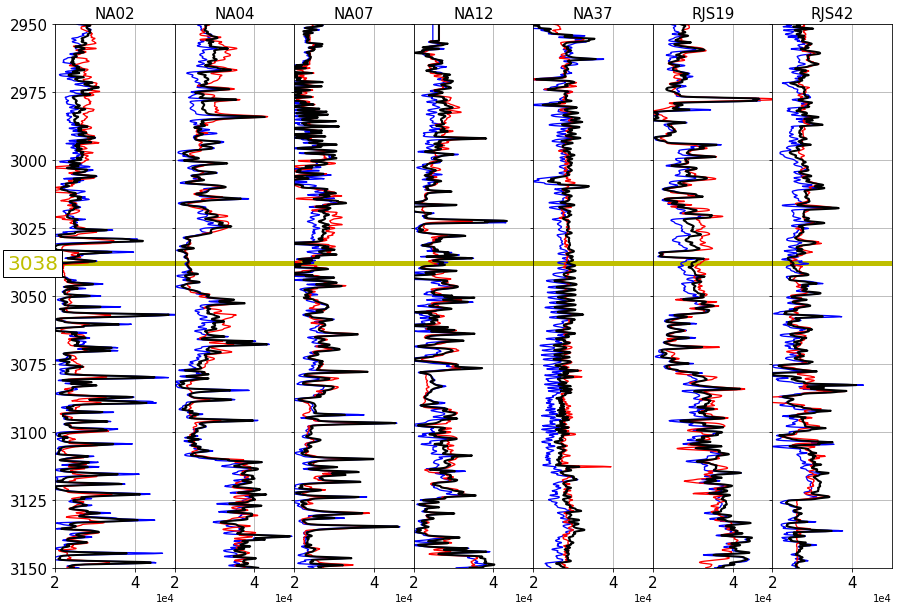

In [45]:
sz1 = 15;sz2 = 15;sz3 = 15;sz = 5;profund = 3038
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1,7);fig.set_size_inches(15, 10);plt.subplots_adjust(wspace=0, hspace=0)
#------------------------------------------------------------------------------------------------------------------------------#
ax1.axhline(y=profund, xmin=0, xmax=100000,linewidth=sz, color='y')
ax1.plot(DATA3[0][:][1],prof,'-b',linewidth = 1.3,label='$Z_{KM}$')
ax1.plot(DATA3[0][:][2],prof,'-r',linewidth = 1.3,label='$Z_{e}$')
ax1.plot(DATA3[0][:][0],prof,'-k',linewidth = 2.0,label='$Z_{obs}$')
#ax1.set_ylabel('Depth ($m$)',fontsize=16)
ax1.set_title('NA02',fontsize=sz2);#ax1.set_xlabel('(a)',fontsize=16)
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.set_xlim(xmax=50000,xmin=20000);ax1.invert_yaxis();ax1.grid()
ax1.text(-0.4,profund,str(profund),va='center',ha="left",size=20,color='y',bbox=dict(facecolor="w"),
         transform=ax1.get_yaxis_transform())
#ax1.legend(loc=1,fontsize=19)
ax1.tick_params(axis='x', labelsize=sz3)
ax1.tick_params(axis='y', labelsize=sz1)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
plt.grid()
#ax1.set_xticklabels([])
#------------------------------------------------------------------------------------------------------------------------------#
ax2.axhline(y=profund, xmin=0, xmax=100000,linewidth=sz, color='y')
ax2.plot(DATA3[1][:][1],prof,'-b',linewidth = 1.3,label='$Z_{KM}$')
ax2.plot(DATA3[1][:][2],prof,'-r',linewidth = 1.3,label='$Z_{e}$')
ax2.plot(DATA3[1][:][0],prof,'-k',linewidth = 2.0,label='$Z_{obs}$')
ax2.set_title('NA04',fontsize=sz2);#ax2.set_xlabel('(a)',fontsize=16)
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.set_xlim(xmax=50000,xmin=20000);ax2.invert_yaxis();ax2.grid()
#ax2.legend(loc=1,fontsize=19)
ax2.tick_params(axis='x', labelsize=sz3)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
plt.grid()
#ax2.set_xticklabels([])
ax2.set_yticklabels([])
#------------------------------------------------------------------------------------------------------------------------------#
ax3.axhline(y=profund, xmin=0, xmax=100000,linewidth=sz, color='y')
ax3.plot(DATA3[2][:][1],prof,'-b',linewidth = 1.3,label='$Z_{KM}$')
ax3.plot(DATA3[2][:][2],prof,'-r',linewidth = 1.3,label='$Z_{e}$')
ax3.plot(DATA3[2][:][0],prof,'-k',linewidth = 2.0,label='$Z_{obs}$')
ax3.set_title('NA07',fontsize=sz2);#ax2.set_xlabel('(a)',fontsize=16)
ax3.set_ylim(ymax=max(prof),ymin=min(prof));ax3.set_xlim(xmax=50000,xmin=20000);ax3.invert_yaxis();ax3.grid()
#ax2.legend(loc=1,fontsize=19)
ax3.tick_params(axis='x', labelsize=sz3)
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
#ax3.set_xticklabels([])
ax3.set_yticklabels([])
#------------------------------------------------------------------------------------------------------------------------------#
ax4.axhline(y=profund, xmin=0, xmax=100000,linewidth=sz, color='y')
ax4.plot(DATA3[3][:][1],prof,'-b',linewidth = 1.3,label='$Z_{KM}$')
ax4.plot(DATA3[3][:][2],prof,'-r',linewidth = 1.3,label='$Z_{e}$')
ax4.plot(DATA3[3][:][0],prof,'-k',linewidth = 2.0,label='$Z_{obs}$')
ax4.set_title('NA12',fontsize=sz2);#ax2.set_xlabel('(a)',fontsize=16)
ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.set_xlim(xmax=50000,xmin=20000);ax4.invert_yaxis();ax4.grid()
#ax2.legend(loc=1,fontsize=19)
ax4.tick_params(axis='x', labelsize=sz3)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
#ax4.set_xticklabels([])
ax4.set_yticklabels([])
#------------------------------------------------------------------------------------------------------------------------------#
ax5.axhline(y=profund, xmin=0, xmax=100000,linewidth=sz, color='y')
ax5.plot(DATA3[4][:][1],prof,'-b',linewidth = 1.3,label='$Z_{KM}$')
ax5.plot(DATA3[4][:][2],prof,'-r',linewidth = 1.3,label='$Z_{e}$')
ax5.plot(DATA3[4][:][0],prof,'-k',linewidth = 2.0,label='$Z_{obs}$')
ax5.set_title('NA37',fontsize=sz2);#ax2.set_xlabel('(a)',fontsize=16)
ax5.set_ylim(ymax=max(prof),ymin=min(prof));ax5.set_xlim(xmax=50000,xmin=20000);ax5.invert_yaxis();ax5.grid()
#ax2.legend(loc=1,fontsize=19)
ax5.tick_params(axis='x', labelsize=sz3)
ax5.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
#ax5.set_xticklabels([])
ax5.set_yticklabels([])
#------------------------------------------------------------------------------------------------------------------------------#
ax6.axhline(y=profund, xmin=0, xmax=100000,linewidth=sz, color='y')
ax6.plot(DATA3[5][:][1],prof,'-b',linewidth = 1.3,label='$Z_{KM}$')
ax6.plot(DATA3[5][:][2],prof,'-r',linewidth = 1.3,label='$Z_{e}$')
ax6.plot(DATA3[5][:][0],prof,'-k',linewidth = 2.0,label='$Z_{obs}$')
ax6.set_title('RJS19',fontsize=sz2);#ax2.set_xlabel('(a)',fontsize=16)
ax6.set_ylim(ymax=max(prof),ymin=min(prof));ax6.set_xlim(xmax=50000,xmin=20000);ax6.invert_yaxis();ax6.grid()
#ax2.legend(loc=1,fontsize=19)
ax6.tick_params(axis='x', labelsize=sz3)
ax6.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
#ax6.set_xticklabels([])
ax6.set_yticklabels([])
#------------------------------------------------------------------------------------------------------------------------------#
ax7.axhline(y=profund, xmin=0, xmax=100000,linewidth=sz, color='y')
ax7.plot(DATA3[6][:][1],prof,'-b',linewidth = 1.3,label='$Z_{KM}$')
ax7.plot(DATA3[6][:][2],prof,'-r',linewidth = 1.3,label='$Z_{e}$')
ax7.plot(DATA3[6][:][0],prof,'-k',linewidth = 2.0,label='$Z_{obs}$')
ax7.set_title('RJS42',fontsize=sz2);#ax2.set_xlabel('(a)',fontsize=16)
ax7.set_ylim(ymax=max(prof),ymin=min(prof));ax7.set_xlim(xmax=50000,xmin=20000);ax7.invert_yaxis();ax7.grid()
#ax2.legend(loc=1,fontsize=19)
ax7.tick_params(axis='x', labelsize=sz3)
ax7.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
#ax7.set_xticklabels([])
ax7.set_yticklabels([])
#------------------------------------------------------------------------------------------------------------------------------#
plt.show()
fig.savefig('KM_image/'+str(profund)+'_7perfis.pdf', dpi=200, transparent=True, bbox_inches='tight')